In [1]:
#importing different libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")   # ignore if any warnings are there

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

    'Daily Time Spent on Site': consumer time on site in minutes
    'Age': customer age in years
    'Area Income': Avg. Income of geographical area of consumer
    'Daily Internet Usage': Avg. minutes a day consumer is on the internet
    'Ad Topic Line': Headline of the advertisement
    'City': City of consumer
    'Male': Whether or not consumer was male
    'Country': Country of consumer
    'Timestamp': Time at which consumer clicked on Ad or closed window
    'Clicked on Ad': 0 or 1 indicated clicking on Ad


In [2]:
#Importing the dataset
df=pd.read_csv(r"C:\Jupyter\DSML\DSML\Logistic Regression\advertising.csv")
df=pd.DataFrame(df)
df.shape

(1000, 10)

In [3]:
df.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
df.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0


In [6]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [7]:
#Check for missing values
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

Clicked on Ad               0.0
Timestamp                   0.0
Country                     0.0
Male                        0.0
City                        0.0
Ad Topic Line               0.0
Daily Internet Usage        0.0
Area Income                 0.0
Age                         0.0
Daily Time Spent on Site    0.0
dtype: float64

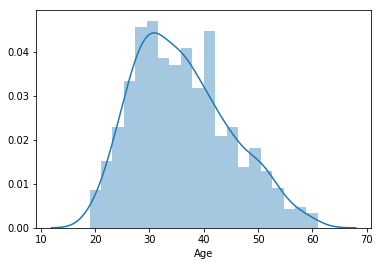

In [8]:
#As there are no missing values we can start exploring the data
sbn.distplot(df['Age'], bins=20)

In [9]:
df['Ad Topic Line'].head(50)
#doesn't look like this column will help much. So I'd drop it.

0                Cloned 5thgeneration orchestration
1                Monitored national standardization
2                  Organic bottom-line service-desk
3             Triple-buffered reciprocal time-frame
4                     Robust logistical utilization
5                   Sharable client-driven software
6                        Enhanced dedicated support
7                          Reactive local challenge
8                    Configurable coherent function
9                Mandatory homogeneous architecture
10                   Centralized neutral neural-net
11    Team-oriented grid-enabled Local Area Network
12            Centralized content-based focus group
13                 Synergistic fresh-thinking array
14                    Grass-roots coherent extranet
15               Persistent demand-driven interface
16               Customizable multi-tasking website
17                       Intuitive dynamic attitude
18     Grass-roots solution-oriented conglomeration
19          

In [10]:
#considering city and country as categorical values and coding them in one numeric feature.
df['City Codes']= df['City'].astype('category').cat.codes
df['Country Codes']= df['Country'].astype('category').cat.codes
df[['City Codes','Country Codes']].head(3)

,City Codes,Country Codes
0,961,215
1,903,147
2,111,184


In [11]:
df.drop(['City','Country','Ad Topic Line'],axis=1,inplace = True)
df.head(4)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,City Codes,Country Codes
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0,961,215
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0,903,147
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0,111,184
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0,939,103


In [12]:
#Look for corelation with Clicked on Ad
# Create correlation matrix
corr_matrix = df.corrwith(df['Clicked on Ad']).abs()
corr_matrix

Daily Time Spent on Site    0.748117
Age                         0.492531
Area Income                 0.476255
Daily Internet Usage        0.786539
Male                        0.038027
Clicked on Ad               1.000000
City Codes                  0.007554
Country Codes               0.011415
dtype: float64

In [13]:
df['Timestamp']=df['Timestamp'].map(pd.to_datetime)
df['dom']=(df['Timestamp']).dt.day
df['month']=(df['Timestamp']).dt.month
df['hour']=(df['Timestamp']).dt.hour
df.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,City Codes,Country Codes,dom,month,hour
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0,961,215,27,3,0
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0,903,147,4,4,1
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0,111,184,13,3,20


In [14]:
#Looked for corelation with Clicked on Ad again
# Create correlation matrix
corr_matrix = df.corrwith(df['Clicked on Ad']).abs()
corr_matrix

Daily Time Spent on Site    0.748117
Age                         0.492531
Area Income                 0.476255
Daily Internet Usage        0.786539
Male                        0.038027
Clicked on Ad               1.000000
City Codes                  0.007554
Country Codes               0.011415
dom                         0.005269
month                       0.016095
hour                        0.047431
dtype: float64

In [15]:
#Dropping the column timestamp
df.drop(labels=['Timestamp'], axis=1,inplace=True)

Applying Logistic Regression

In [16]:
x = df.drop(labels=['Clicked on Ad'], axis=1)
y = df['Clicked on Ad']

#spiltting the dataset into train and test dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=101)

In [17]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
#predecting the value of y_pred
y_pred = model.predict(x_test)
#checking the accuracy score
accuracy_score(y_pred,y_test)

0.9242424242424242

In [19]:
print(classification_report(y_pred,y_test,target_names=['Not Clicked','Clicked']))

              precision    recall  f1-score   support

 Not Clicked       0.95      0.91      0.93       178
     Clicked       0.90      0.94      0.92       152

    accuracy                           0.92       330
   macro avg       0.92      0.93      0.92       330
weighted avg       0.93      0.92      0.92       330



In [20]:
print(confusion_matrix(y_pred,y_test))

[[162  16]
 [  9 143]]


Applying Linear Regression


In [21]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True, fit_intercept=True)
trainX,testX, trainY,testY = train_test_split(x,y,test_size=0.33, random_state=1)

In [22]:
lr.fit(trainX,trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [23]:
pred = lr.predict(testX)

In [24]:
print('Mean Absolute Error is ',mean_absolute_error(y_pred=pred,y_true=testY))
print('R2 Score is ',r2_score(y_pred=pred,y_true=testY))

Mean Absolute Error is  0.1596335066059253
R2 Score is  0.7722107797251592
